In [29]:
import sys
import itertools
import argparse
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

sys.path.insert(0, '../')
import preprocess_csv as preprocess
from textrank.textrank import KeywordSummarizer


def merge_dicts(a, b):
    c = a.copy()  # a 변수를 c에 copy 한 후
    c.update(b)   # c를 update하여 반환

    return c    


def tokenizer(text):
    '''
    apply tokenizer
    '''
    cachedStopWords = stopwords.words("english")
    RegTok = RegexpTokenizer("[\w']{3,}")
    english_stops = set(stopwords.words('english'))
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    
    stemmer = PorterStemmer()
    word_token = [stemmer.stem(i) for i in words]
    
    return word_token



def get_token2word_dict(papers):
    '''
    return the list of dictionary (key: stemmized token, value: original word)
    '''
    word_token_list = []
    for text in papers:
        cachedStopWords = stopwords.words("english")
        RegTok = RegexpTokenizer("[\w']{3,}")
        english_stops = set(stopwords.words('english'))
        tokens = RegTok.tokenize(text.lower())
        # stopwords 제외
         # stopwords 제외
        words = [word for word in tokens if (word not in english_stops) and len(word) > 2]

        stemmer = PorterStemmer()
        word_token_dict = [{stemmer.stem(word):word} for word in words]
        word_token_list.append(word_token_dict)
        
    # flatten
    word_token_list = list(itertools.chain(*word_token_list))
    
    word_token_dict = dict()
    for element in word_token_list:
        word_token_dict = merge_dicts(word_token_dict, element)
    
    return word_token_dict


def frequency_analysis(word_token):
    #상위 30개까지만 확인
    n = 30

    frequency_series = pd.Series(word_token).value_counts().head(n)

    # frequency_series.to_csv("./data/topic3/topic3_frequency.csv")

    #print(frequency_series)
    return frequency_series


def get_frequency(data_path, save_path):
    filename = '/topic' + save_path[-1] + '_NewFrequency.csv'
    # lemmatizer for lemmatization
    lemmatizer = WordNetLemmatizer()

    # extract texts (abstracts)
    df = pd.read_csv(data_path)
    papers = preprocess.extract_text(df)
    word_token = [tokenizer(paper) for paper in papers]
    word_token = list(itertools.chain(*word_token))
    
    # get frequency
    frequency_series = frequency_analysis(word_token)
    fq = pd.DataFrame()
    fq['keyword'] = np.array(frequency_series.index)
    fq['count'] = frequency_series.values
    
    # get origin word
    word_token_dict = get_token2word_dict(papers)
    
    # convert to df and save it in the csv format
    keywords = fq['keyword']
    lemma_keywords = [lemmatizer.lemmatize(word_token_dict[keyword], pos='v') for keyword in keywords]

    fq_df = pd.DataFrame()
    fq_df['keyword'] = lemma_keywords; fq_df['count'] = fq['count']

    fq_df.to_csv('../fig' + save_path + filename, index=False)

In [25]:
data_path = '../data/topic2/trust_robot.csv'
save_path = '/topic2'
frequency = get_frequency(data_path, save_path)

In [30]:
data_path = '../data/topic3/user*.csv'
save_path = '/topic3'
get_frequency(data_path, save_path)

In [32]:
data_path = '../data/topic6/diving*.csv'
save_path = '/topic6'
get_frequency(data_path, save_path)

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_figure_forFrequency(x, y, xlabel, ylabel, save_path):
#     print([x[i] for i in range(0, 30, 5)])
    sns.set(rc={'figure.figsize': (25, 30)}) #, 'axes.labelsize':25})
    splot = sns.barplot(x=x, y=y, color='tab:blue', orient='h')
    splot.set_xlabel(xlabel, size=25)
    splot.set_ylabel(ylabel, size=25)
#     sns.set(font_scale=2)
    x_ticks = [int(i) for i in splot.get_xticks()]
    splot.set_xticklabels(x_ticks, size=25)
    splot.set_yticklabels([i for i in y], size=25)
#     splot.set_xticks([i for i in x])
#     sns.set(rc={'axes.labelsize', 20})
#     sns.rc('ytick', labelsize=20) 
    splot.invert_yaxis()
    sfig = splot.get_figure()
    sfig.savefig(save_path)

In [290]:
fq_df['count'].values

array([ 372,  375,  381,  392,  413,  414,  420,  427,  427,  432,  434,
        436,  438,  443,  448,  459,  460,  484,  492,  538,  553,  627,
        632,  648,  759,  868,  877, 1317, 1491, 2836])

In [291]:
[(i, fq_df['count'].values[i]) for i in range(0, 30, 5)]

[(0, 372), (5, 414), (10, 434), (15, 459), (20, 553), (25, 868)]

/var/folders/f8/6p0t23zx0p9c90vcc29hyy1h0000gn/T/ipykernel_36311/3634698193.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_xticklabels(x_ticks, size=25)


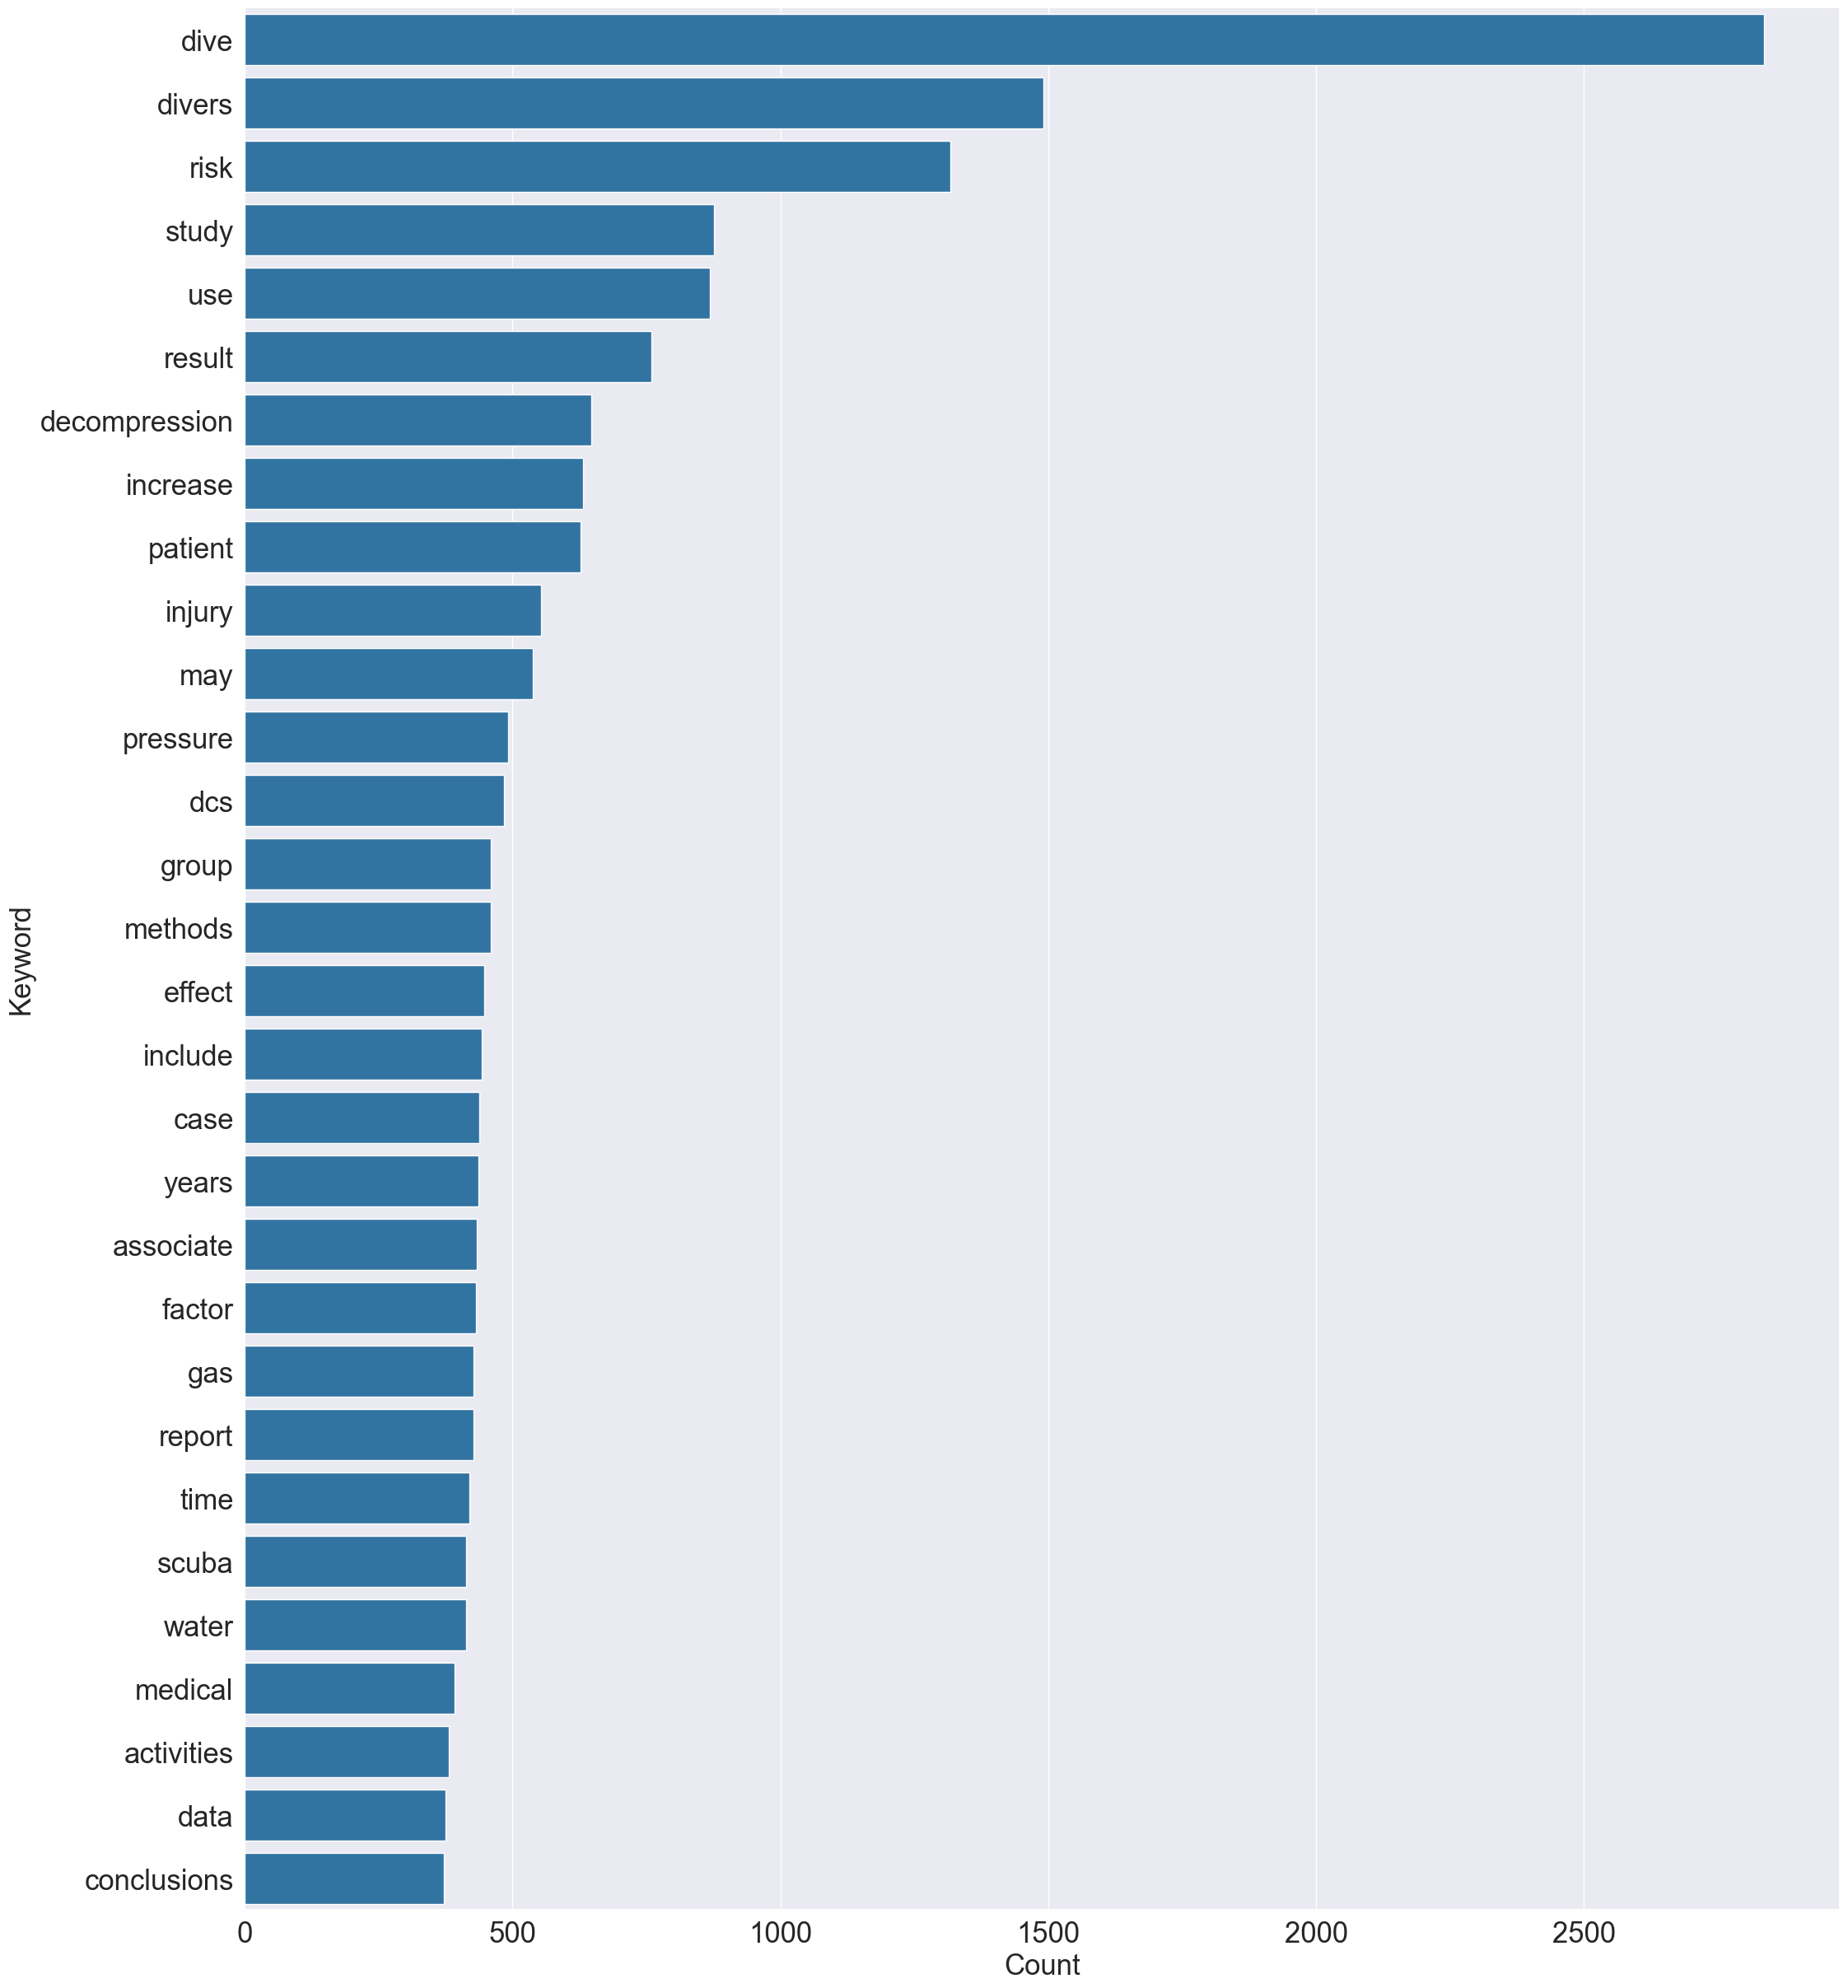

In [310]:
xlabel = 'Count'; ylabel = 'Keyword'
save_path = '../figure/topic6/topic6_Frequency.png'
fq_df = pd.read_csv('../data/topic6/topic6_NewFrequency.csv')
fq_df = fq_df.sort_values(by=['count'], ascending=True)
show_figure_forFrequency(fq_df['count'].values, fq_df['keyword'].values,xlabel, ylabel, save_path)

In [241]:
fq_df['rank'].values

array([13.9198521 , 14.25714804, 14.31557035, 14.80250446, 14.85871978,
       15.08550909, 15.24601565, 15.50809208, 15.59635746, 15.72168458,
       16.5962991 , 17.22318392, 17.59560552, 17.76317047, 17.89682529,
       17.91056462, 19.01281903, 19.67100761, 23.18120723, 24.22065495,
       27.11632959, 29.34530929, 30.46684888, 31.59300716, 32.37142538,
       34.67200969, 36.35458749, 47.34785614, 56.33303129, 98.42092409])

/var/folders/f8/6p0t23zx0p9c90vcc29hyy1h0000gn/T/ipykernel_36311/3634698193.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_xticklabels(x_ticks, size=25)


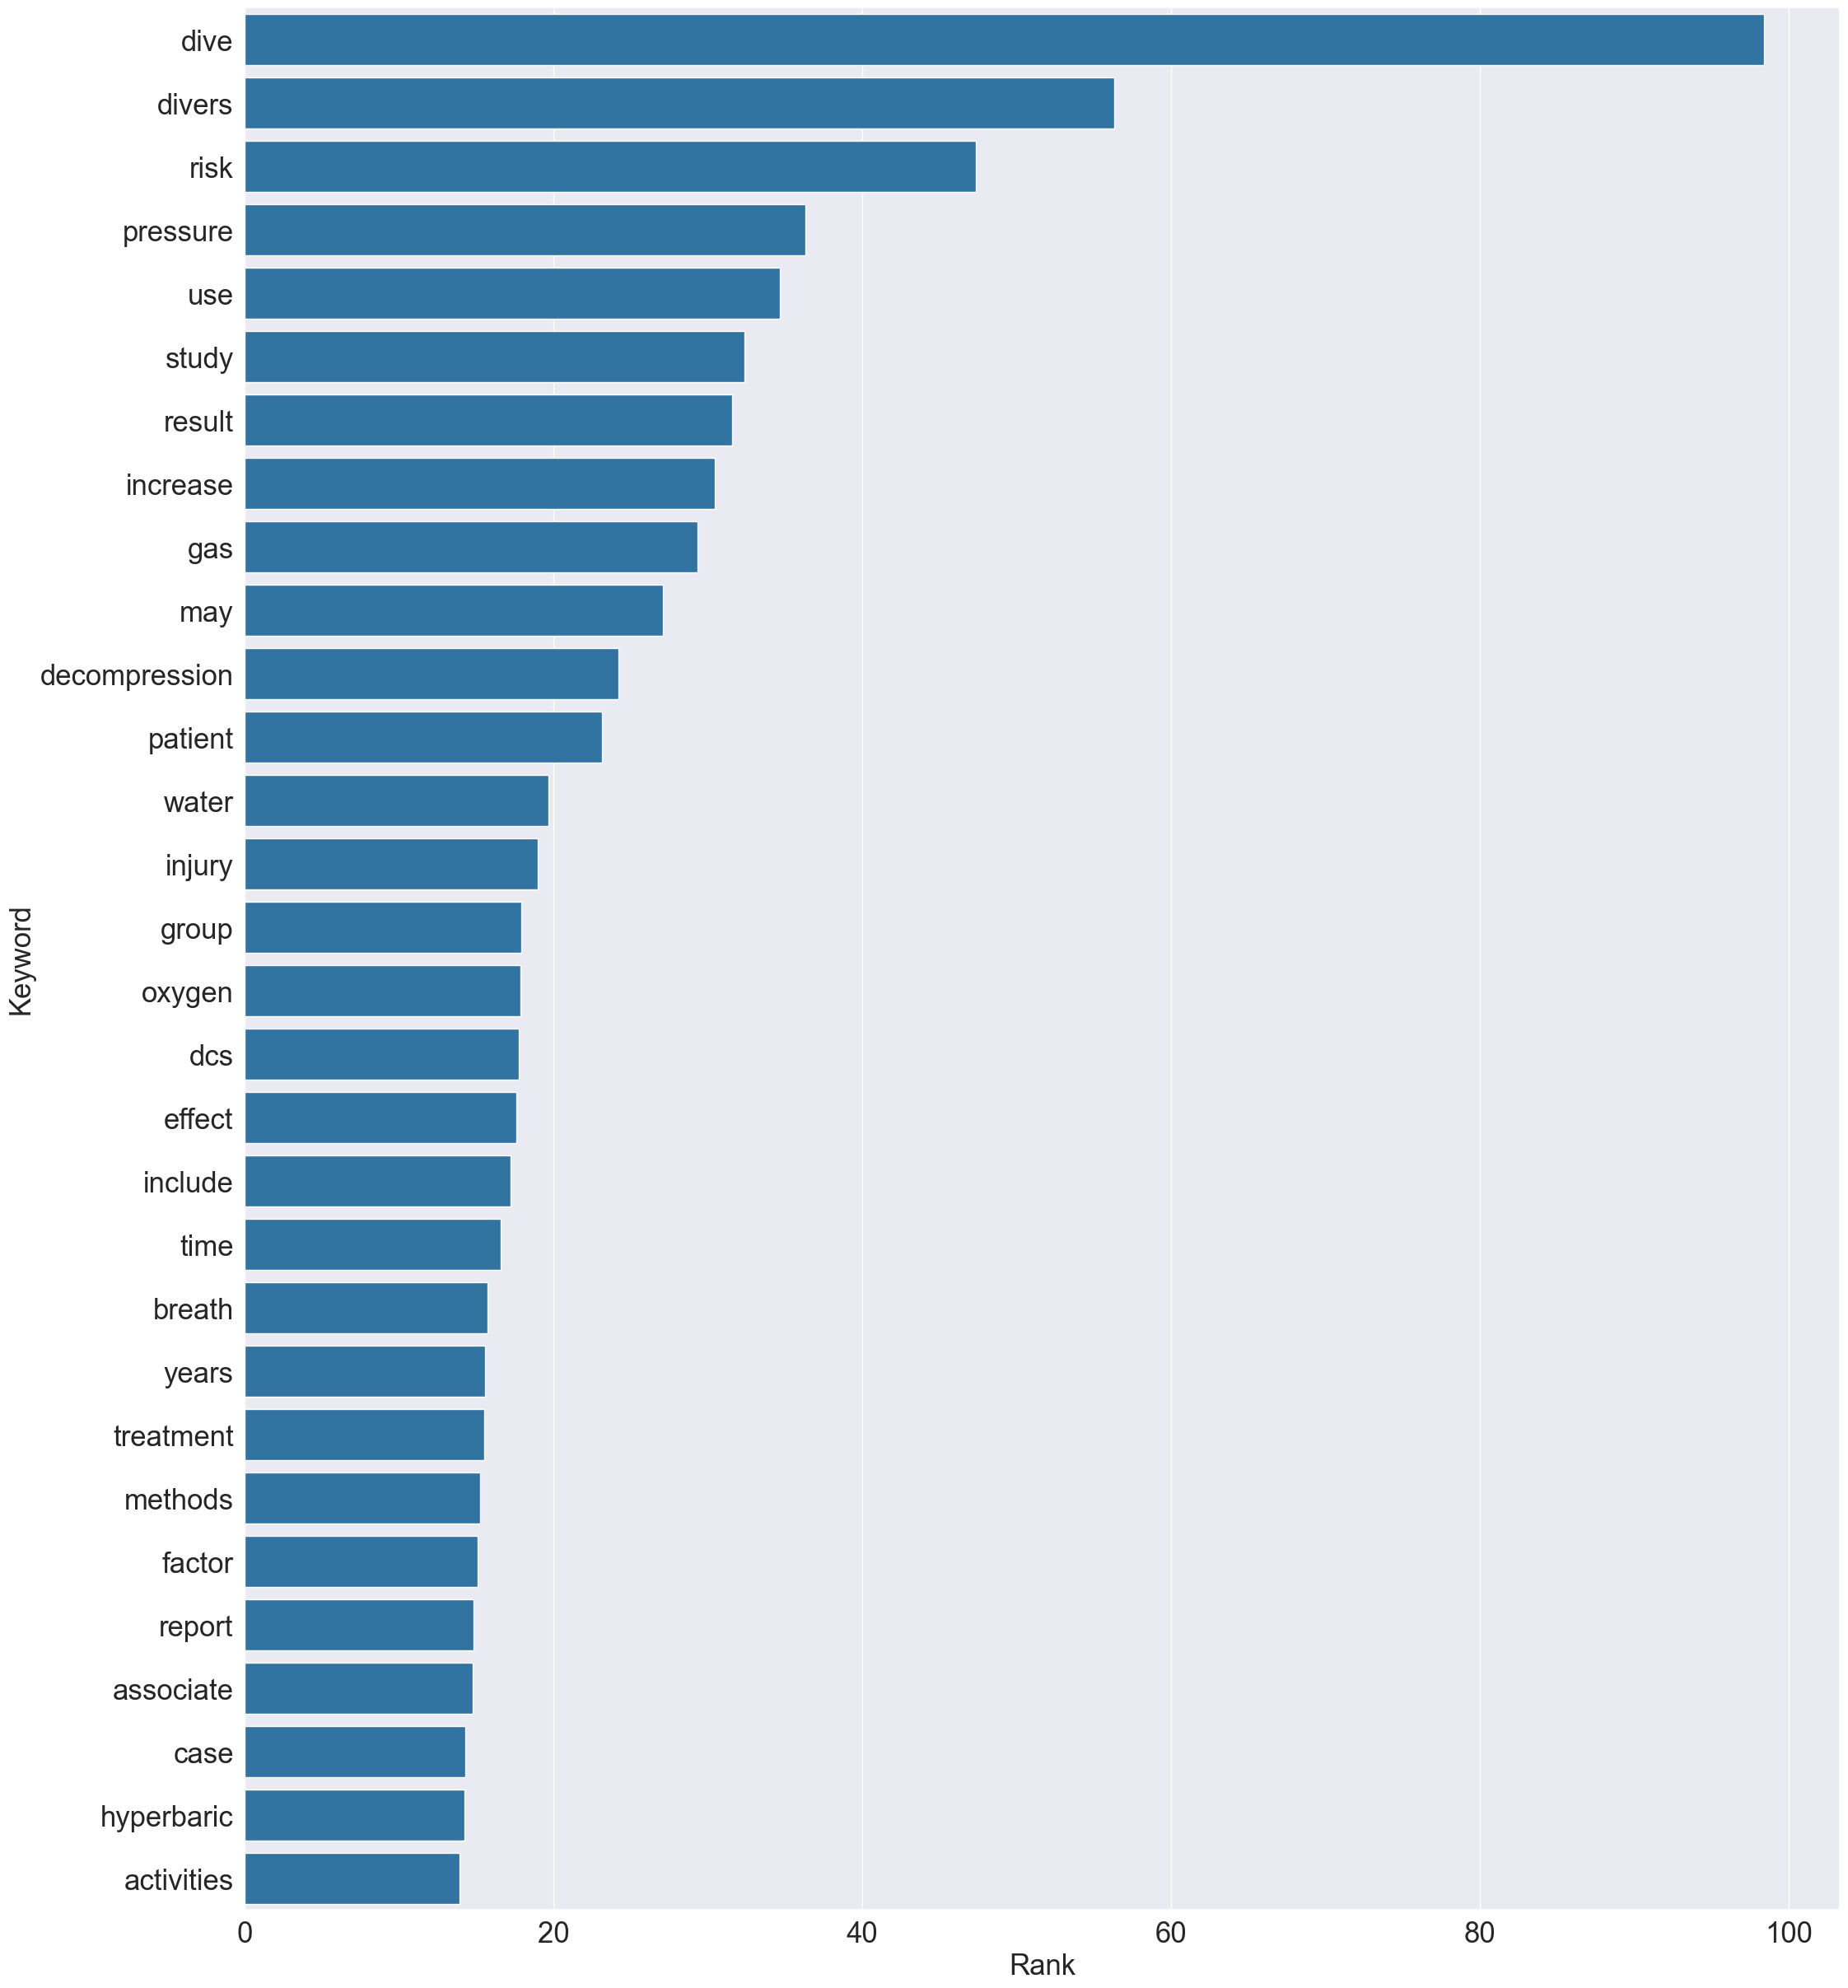

In [313]:
xlabel = 'Rank'; ylabel = 'Keyword'
save_path = '../figure/topic6/topic6_TextRank.png'
fq_df = pd.read_csv('../data/topic6/topic6_TextRank.csv')
fq_df = fq_df.sort_values(by=['rank'], ascending=True)
show_figure_forFrequency(fq_df['rank'].values, fq_df['keyword'].values,xlabel, ylabel, save_path)

In [115]:
fq_df = pd.read_csv('../data/topic2/topic2_NewFrequency.csv')
fq_df = fq_df.sort_values(by=['count'], ascending=False)

In [117]:
fq_df.set_index('keyword')

,count
keyword,
robots,3130
patients,2109
use,1786
surgery,1478
study,1398
result,1109
outcomes,1034
surgical,910
compare,899


In [49]:
fq_df['count'].values

array([3130, 2109, 1786, 1478, 1398, 1109, 1034,  910,  899,  889,  826,
        806,  769,  761,  747,  746,  718,  689,  670,  617,  613,  601,
        597,  597,  580,  575,  570,  562,  558,  556])

,keyword,count
0,robots,3130
1,patients,2109
2,use,1786
3,surgery,1478
4,study,1398
5,result,1109
6,outcomes,1034
7,surgical,910
8,compare,899
9,perform,889


In [159]:
df1 = pd.read_csv('../data/topic2/topic2_NewFrequency.csv')
df2 = pd.read_csv('../data/topic2/topic2_TextRank.csv')


In [162]:
df1['keyword']

0           robots
1         patients
2              use
3          surgery
4            study
5           result
6         outcomes
7         surgical
8          compare
9          perform
10         methods
11          assist
12            time
13        operator
14            rate
15           group
16         include
17      difference
18           human
19           trust
20      conclusion
21            data
22        approach
23          system
24       treatment
25       procedure
26          cancer
27    laparoscopic
28      controller
29           train
Name: keyword, dtype: object

In [169]:
for k in df1['keyword']:
    if not (k in df2['keyword'].values):
        print(k)

trust
system
procedure


In [166]:
print(df1['keyword'])
print(df2['keyword'])

0           robots
1         patients
2              use
3          surgery
4            study
5           result
6         outcomes
7         surgical
8          compare
9          perform
10         methods
11          assist
12            time
13        operator
14            rate
15           group
16         include
17      difference
18           human
19           trust
20      conclusion
21            data
22        approach
23          system
24       treatment
25       procedure
26          cancer
27    laparoscopic
28      controller
29           train
Name: keyword, dtype: object
0           robots
1         patients
2              use
3            study
4          surgery
5           result
6         outcomes
7          compare
8         surgical
9          perform
10         methods
11          assist
12           group
13            rate
14            time
15         include
16      difference
17        operator
18            data
19      conclusion
20       treatment
21